In [336]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [337]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [338]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    )

In [445]:
save_dir_path = "./save_directory" 


In [446]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [447]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 452 with the value: 69.777019, the losses of the last 5 epochs are: [69.77701942125957, 69.79081885019939, 70.3370639483134, 70.41405820846558, 70.53576278686523]
  Lowest loss of metric 'train_variance_loss_' recorded in epoch 456 with the value: 87.728152, the losses of the last 5 epochs are: [88.58246768604626, 88.62272805878611, 87.76968724799879, 87.82587450200862, 87.72815218838778]
  Lowest loss of metric 'train_prediction_loss_' recorded in epoch 451 with the value: 83.439843, the losses of the last 5 epochs are: [83.67355889985056, 83.98546958692145, 83.85121114326246, 83.98957784248121, 83.55990571686716]
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 456 with the value: 90.906781, the losses of the last 5 epochs are: [91.94084451595943, 91.38954509298007, 91.21750803788503, 91.06982686122258, 90.90678095817566]
  Lowest loss of metric 'val_prediction_loss_trainin

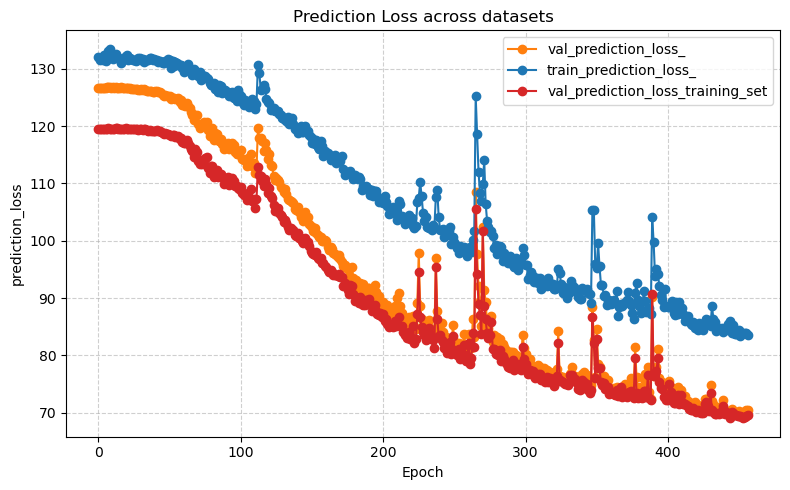

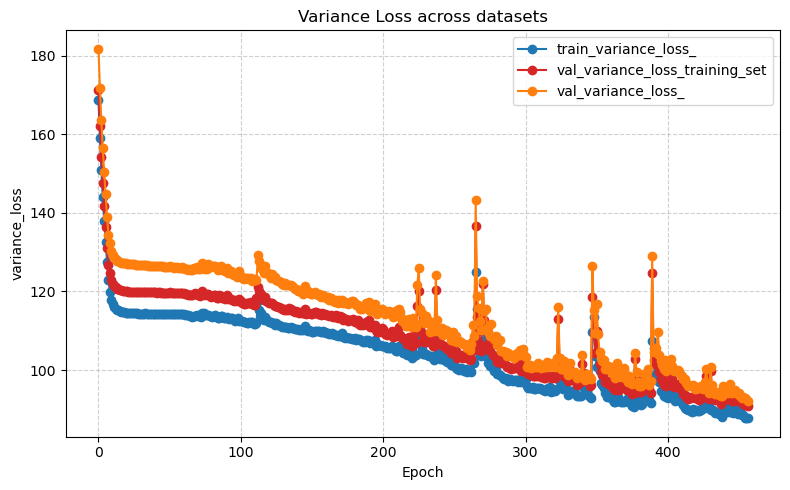

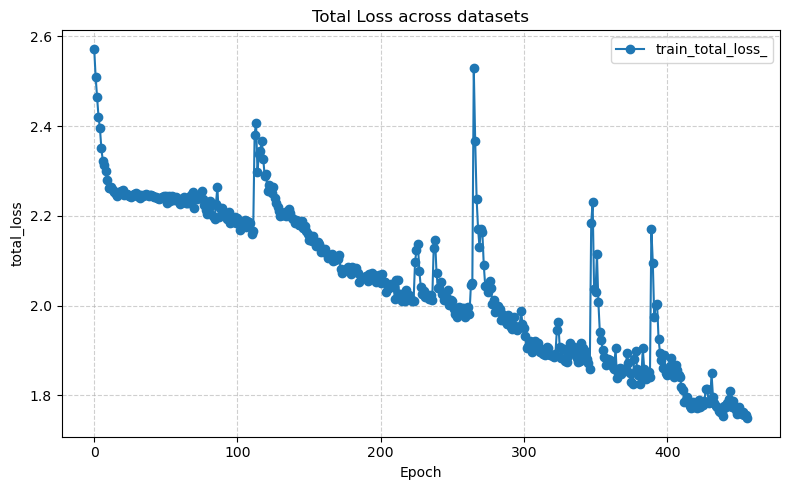

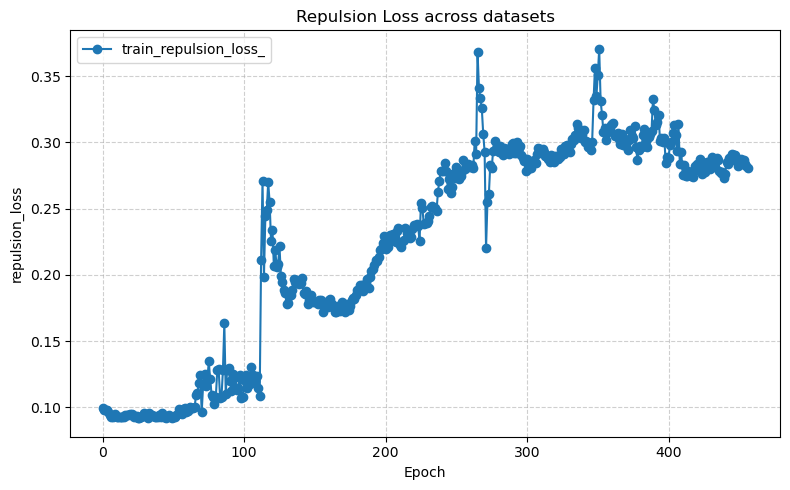

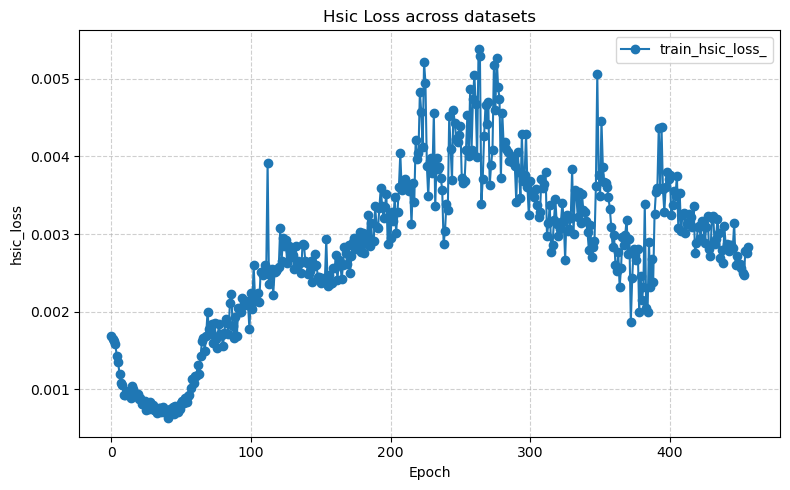

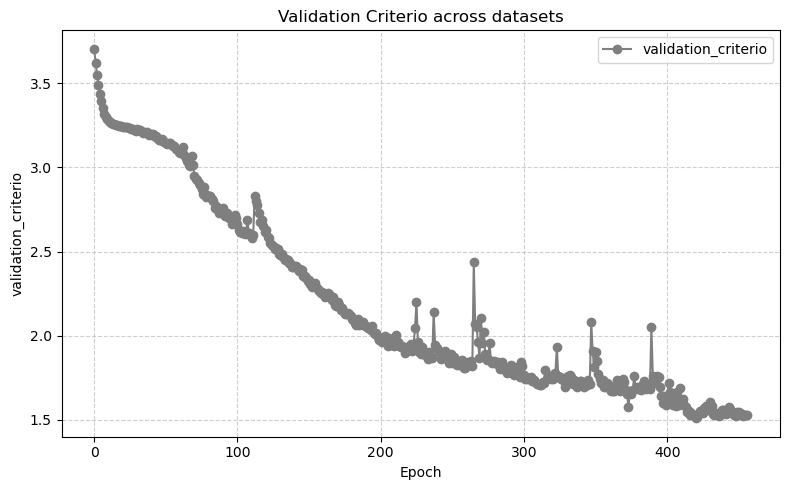


✅ Visualization complete.


In [640]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "train_variance_loss_", "train_prediction_loss_", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio"],
plot_on_same_graph=True,
verbose=True
)



📊 Processing directory: val_trajectories_data

For the epoch_412 in val_trajectories_data the values are:
92: X_mean = -6.1129 ± 7.8922, U_mean = -5.7435 ± 9.1249 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = -6.9183 ± 6.5039, U_mean = -5.2884 ± 7.1549 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = -6.7479 ± 3.0390, U_mean = 0.5729 ± 3.2981 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_412 in val_train_set_trajectories_data the values are:
2: X_mean = -10.3974 ± 3.5291, U_mean = -3.3918 ± 2.8285 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -11.7133 ± 9.0142, U_mean = 4.4725 ± 9.4461 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = -9.8133 ± 7.4640, U_mean = 4.9440 ± 8.0811 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_412 in val_high_energy_trajectories_data the values a

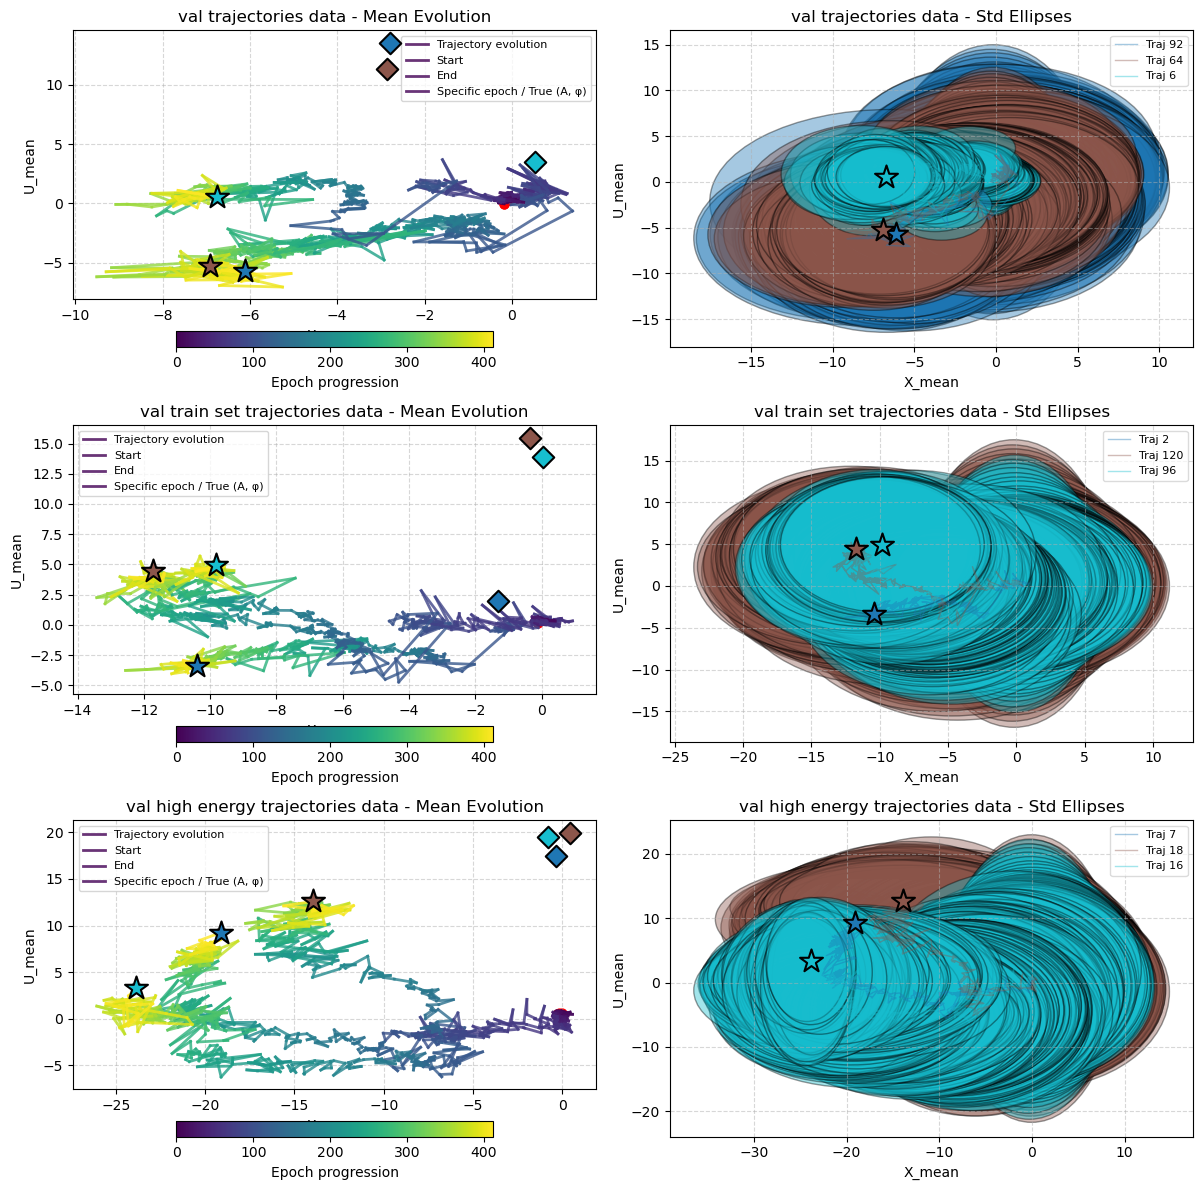


✅ Mean + Std (ellipse) visualization complete.


In [625]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [626]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_412
✅ Data extraction complete.


In [627]:
np.cov(val_train_differencies_set_df['A'], val_train_differencies_set_df['phi'])

array([[14.40715418,  0.41387528],
       [ 0.41387528,  3.84213375]])

In [628]:
np.cov(val_train_differencies_set_df['X_mean'], val_train_differencies_set_df['U_mean'])

array([[ 6.05421191, -2.96661283],
       [-2.96661283, 15.82698712]])

14.94

In [629]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [630]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0108)

0.0657

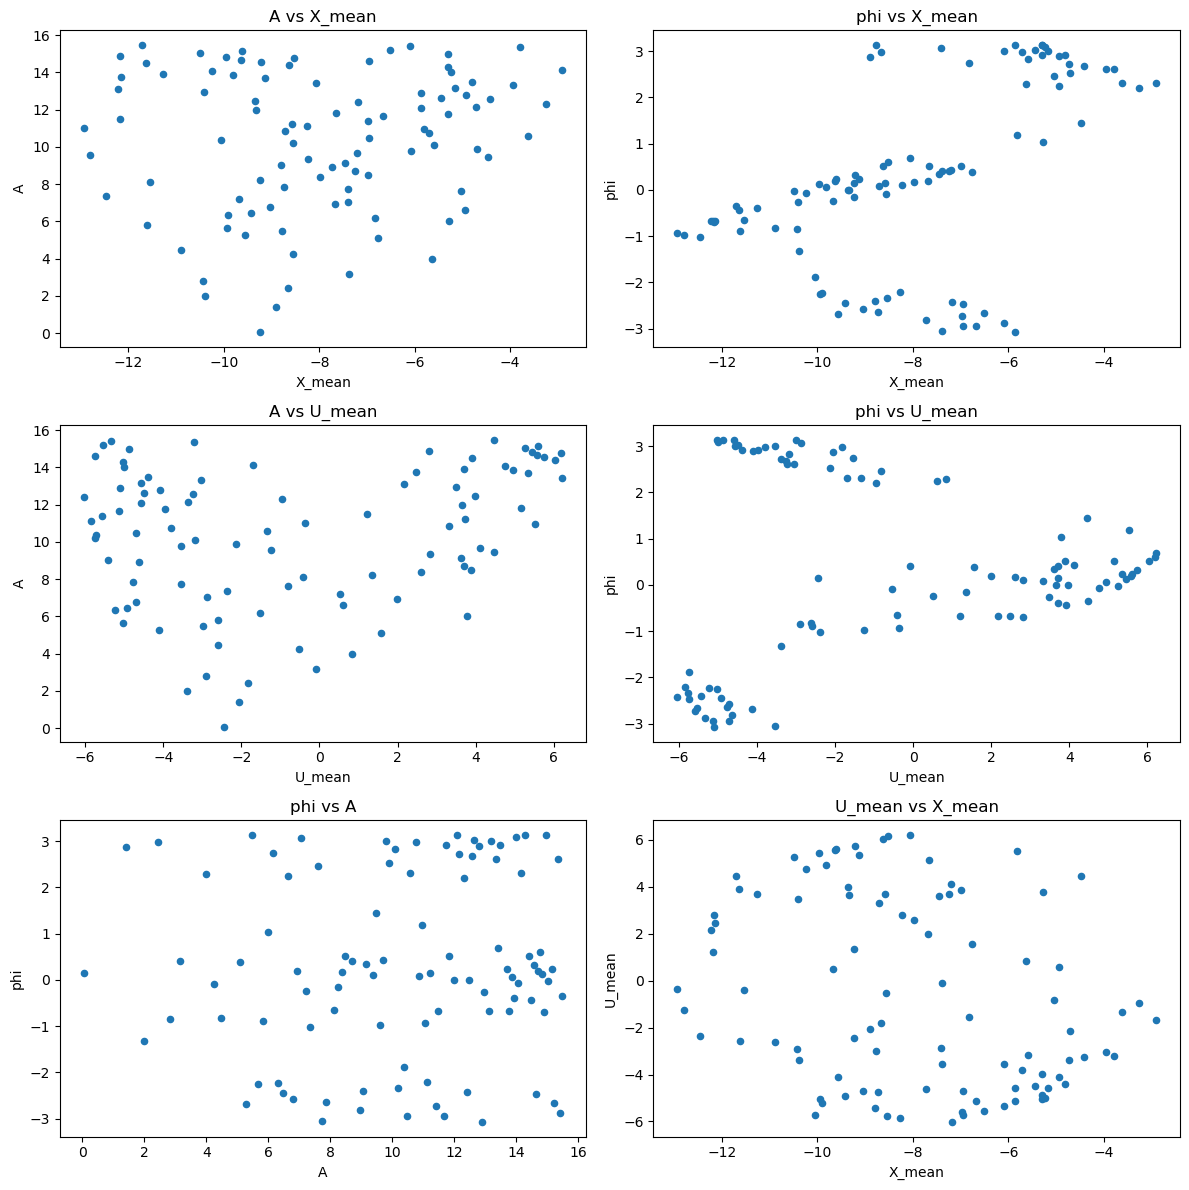

In [631]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 36 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


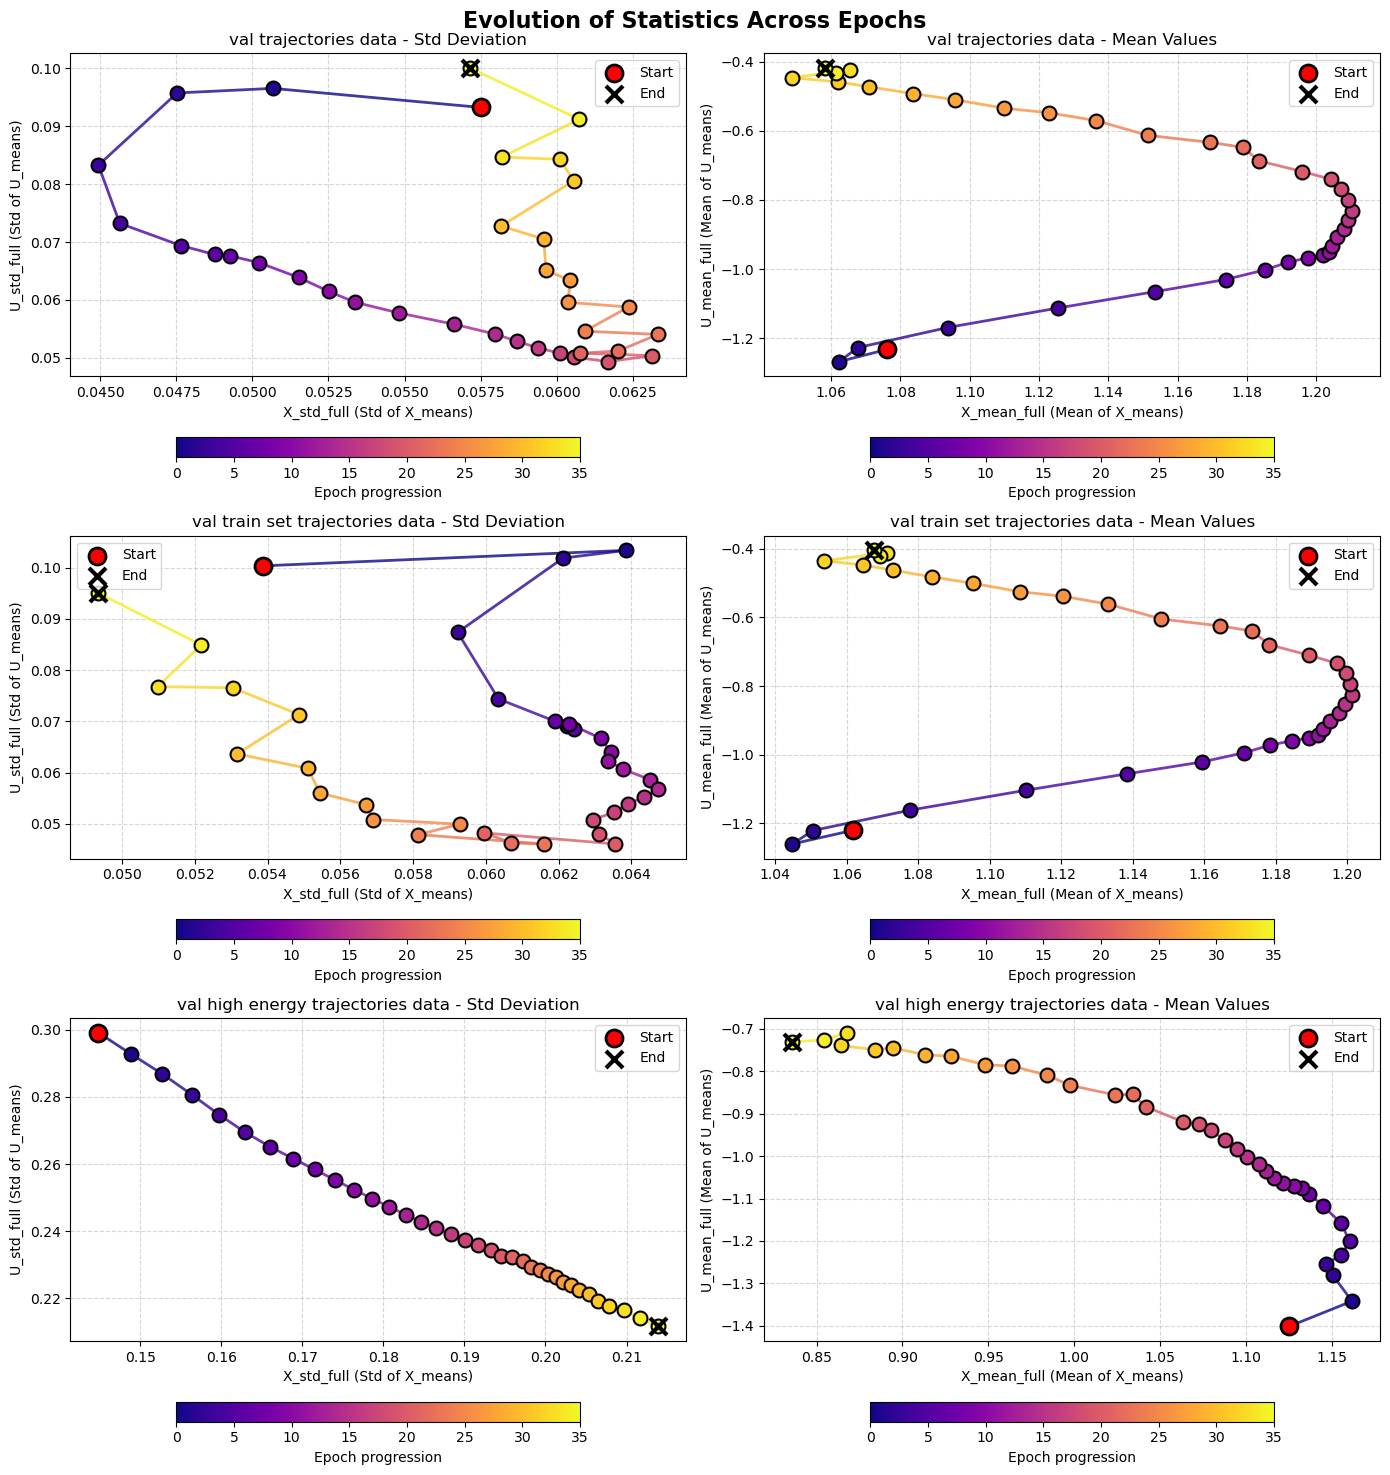

In [156]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [6]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
        
        # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,
    a_innit=1.0,
    gamma_innit=5.0,
    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "checkpoint_epoch_700.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:3617: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [11]:
count_parameters(mapping_net)

9500

In [34]:
test_id_df[['trajectory_id', 'energy']]

,trajectory_id,energy
53,53,53.000562
81,81,81.000331
39,39,39.000678
117,117,117.000033
75,75,75.000380
12,12,12.000901
88,88,88.000273
7,7,7.000942
67,67,67.000446
101,101,101.000165


In [36]:
test_id_df_high_energy_revised[['trajectory_id', 'energy']]

,trajectory_id,energy
6,6,147.129032
12,12,173.258065
4,4,138.419355
29,29,247.290323
20,20,208.096774
14,14,181.967742
10,10,164.548387
19,19,203.741935
22,22,216.806452
15,15,186.322581


Observed time points: [0.]


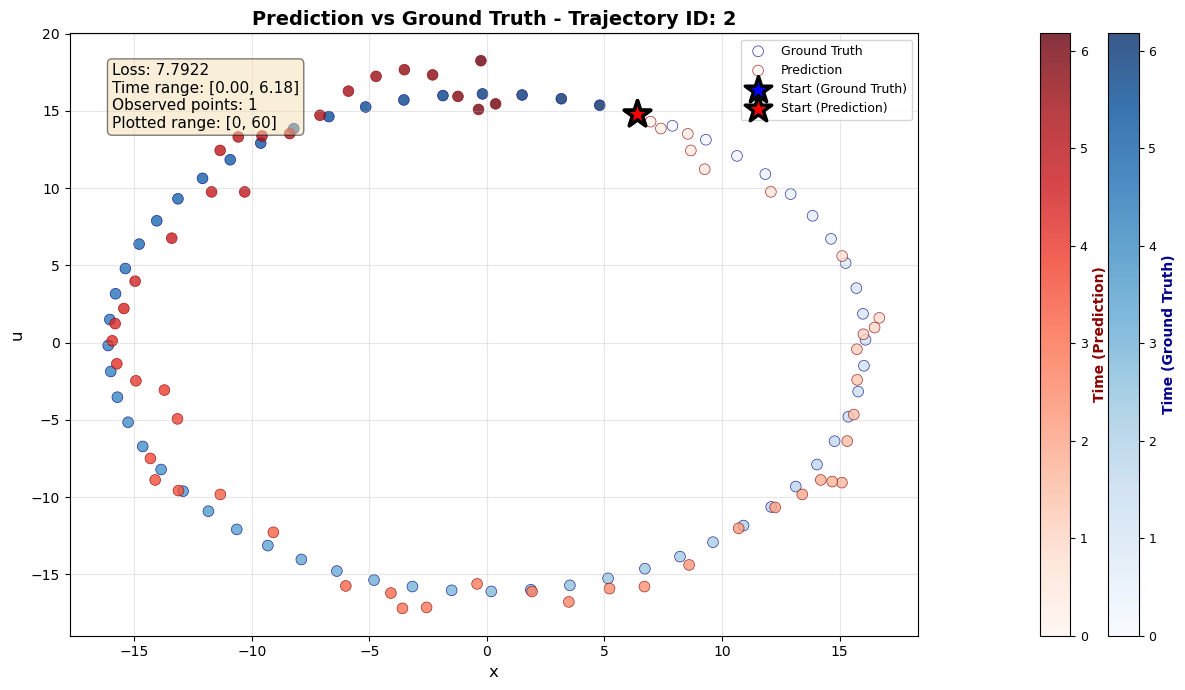

In [39]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=2, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=[0], connect_points=False, portion_to_visualize=[0, 60])

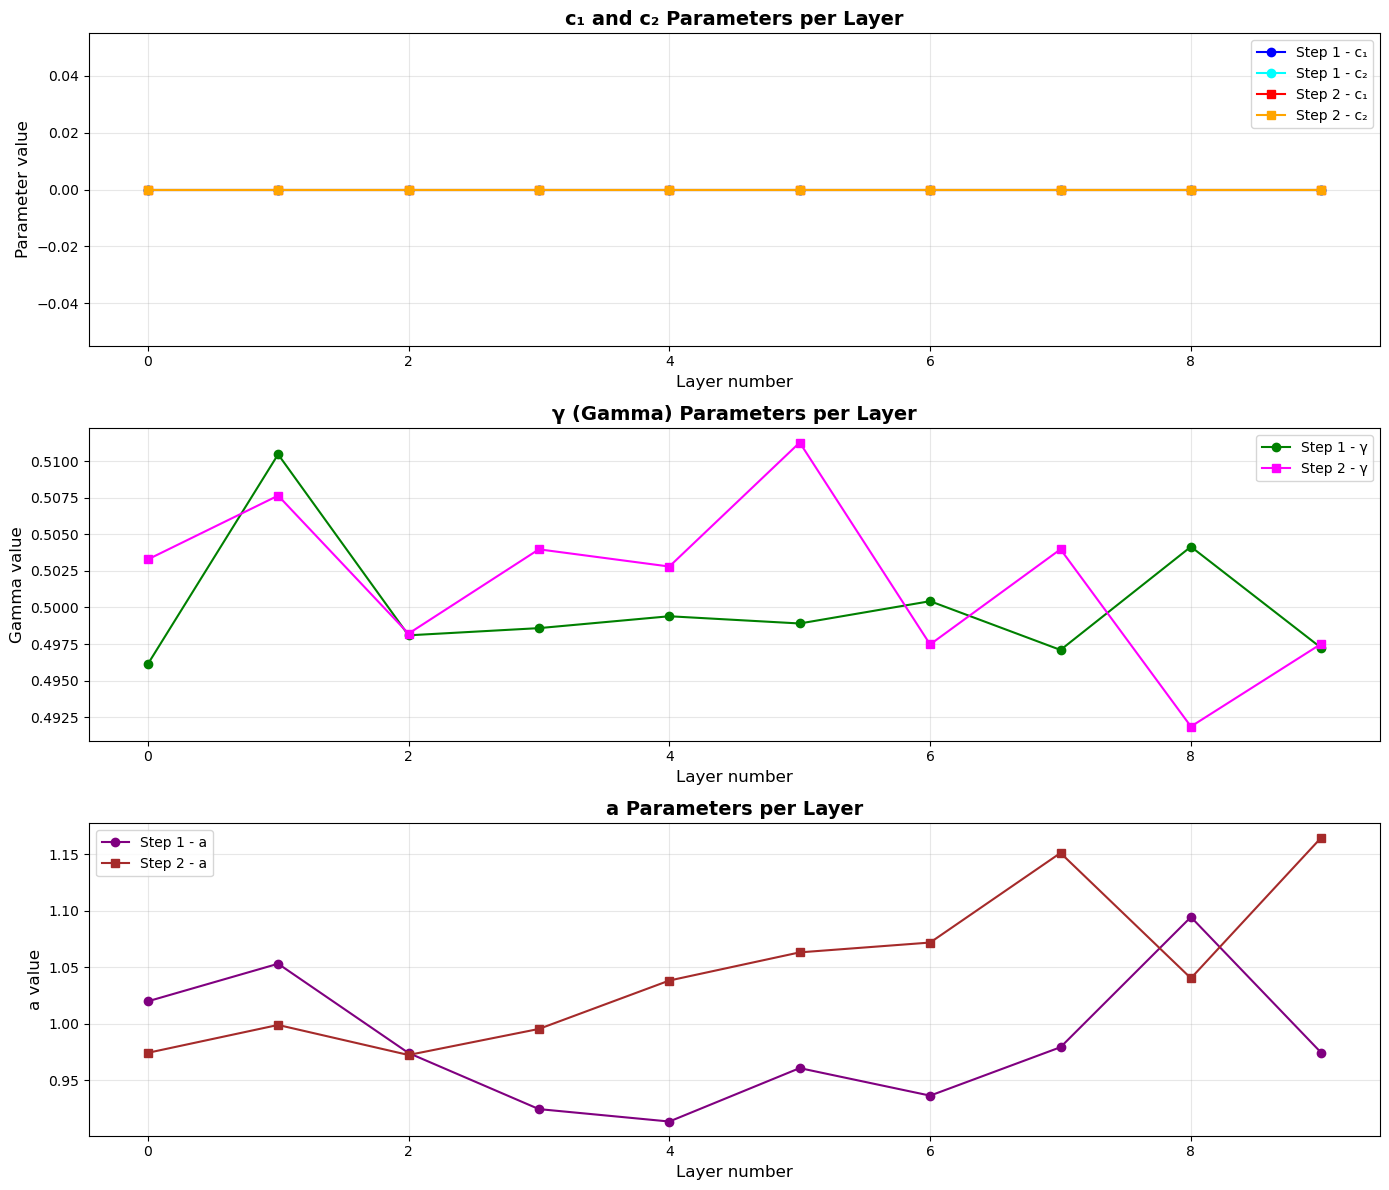

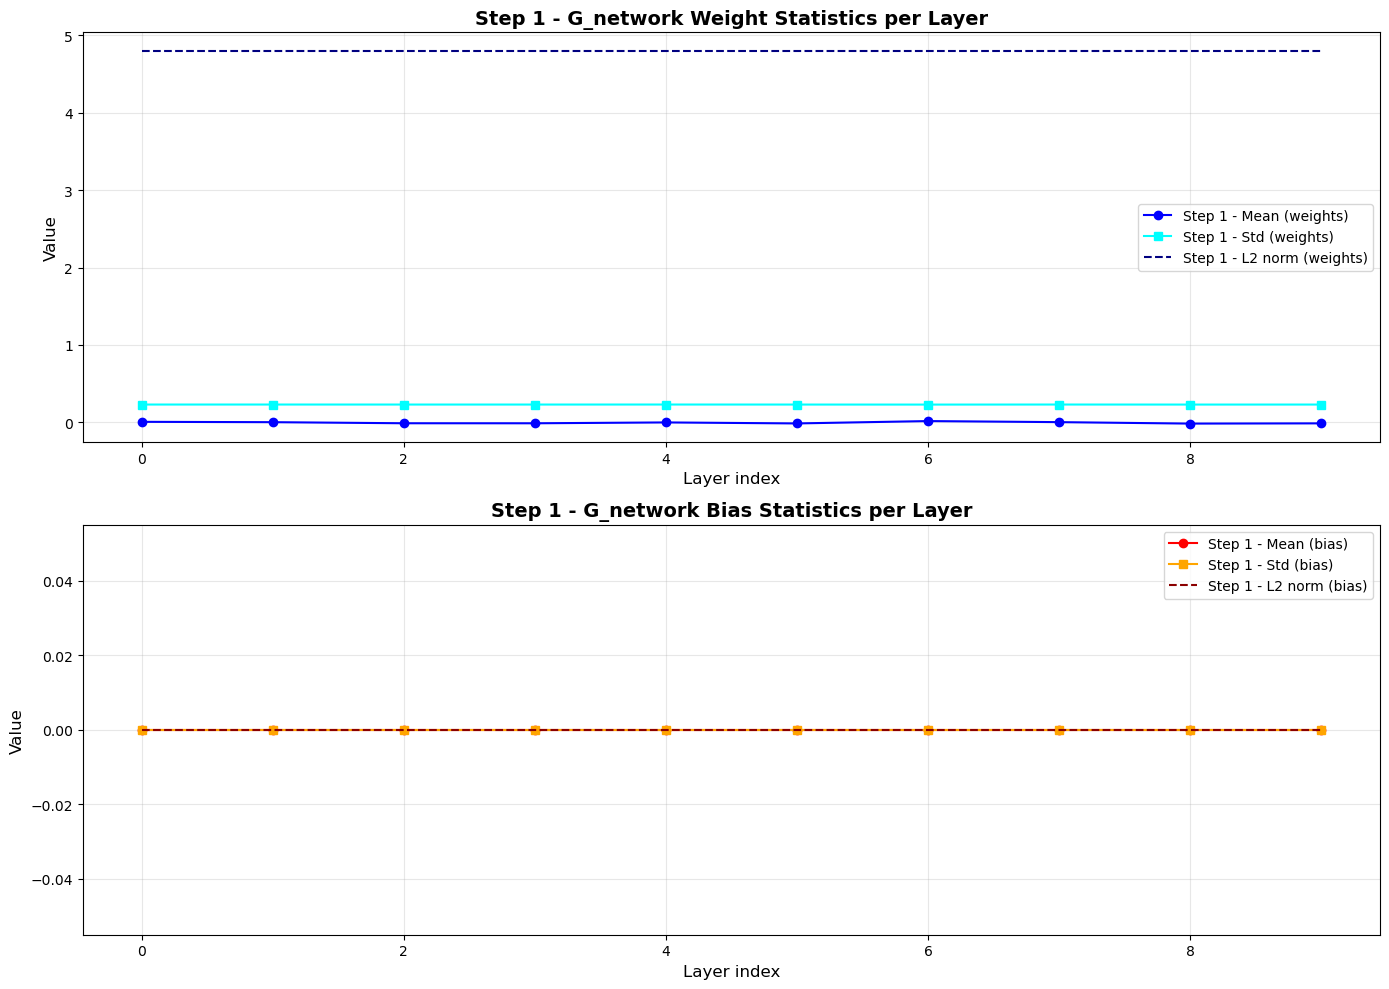

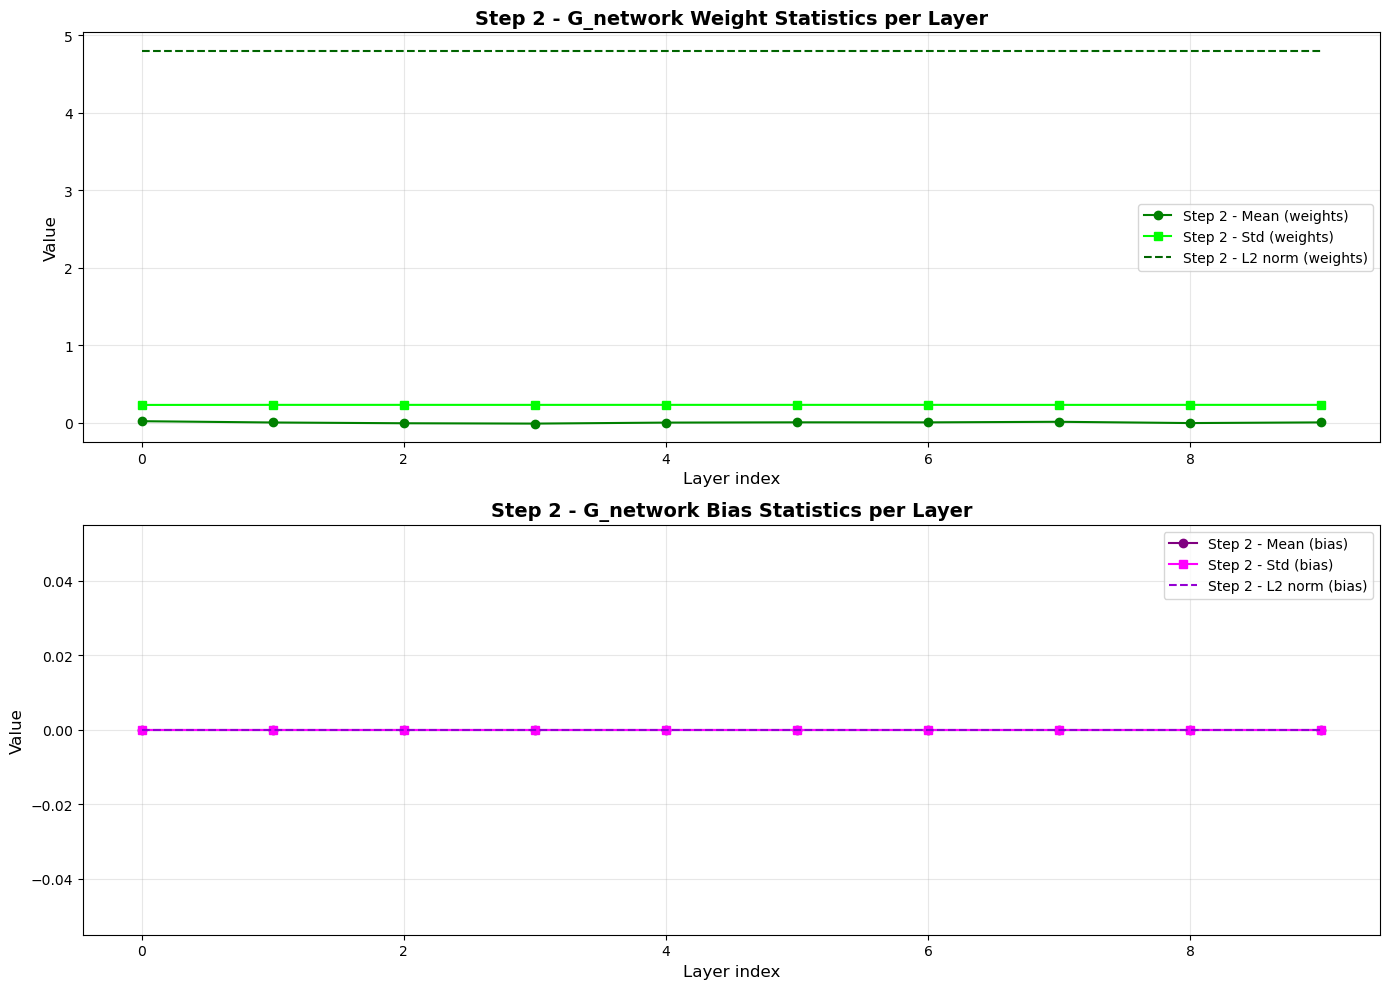

In [461]:
param_data = analyze_mapping_net(mapping_net_test, return_lists=True)


In [23]:
np.array(param_data['step_1_gamma_values']).mean()

np.float64(3.250084698200226)

In [25]:
np.array(param_data['step_1_gamma_values']).std()

np.float64(1.466059152873532)

In [24]:
np.array(param_data['step_2_gamma_values']).mean()

np.float64(2.3681195855140684)

In [26]:
np.array(param_data['step_2_gamma_values']).std()

np.float64(0.6621025002119745)

In [459]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=10,
        # MLP Architecture parameters
        hidden_dims= [10, 20, 10],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 0.5,
        step_2_gamma_mean_innit= 0.5,
        std_to_mean_ratio_gamma_mean_init= 0.01,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    ).to(device)
    

In [460]:
count_parameters(mapping_net_test)

9500

In [67]:
count_parameters(mapping_net_test)

15260

In [72]:
def get_data_from_trajectory_id(ids_df, data_df, trajectory_ids):
    """
    Return the exact portion(s) of `data_df` corresponding to one or more trajectory_ids.
    - Preserves data_df's original indexing (no reset).
    - If trajectory_ids contains all ids in ids_df, returns data_df unchanged.
    - If any requested id is missing, prints missing ids and returns None.
    """
    # normalize to list of ints (preserve order)
    if isinstance(trajectory_ids, (np.integer, int)):
        trajectory_ids = [int(trajectory_ids)]
    else:
        trajectory_ids = [int(x) for x in trajectory_ids]

    # ensure id columns are ints in ids_df
    ids_df = ids_df.copy()
    for col in ("start_index", "end_index", "generated_points", "trajectory_id"):
        if col in ids_df.columns:
            ids_df[col] = ids_df[col].astype("int64")

    existing_ids = list(ids_df["trajectory_id"].values)
    missing = [tid for tid in trajectory_ids if tid not in existing_ids]
    if missing:
        print(f"trajectory_id(s) {missing} not in ids_df. Pick from {existing_ids}")
        return None

    # special-case: request for all trajectories -> return full data_df unchanged
    if set(trajectory_ids) == set(existing_ids):
        return data_df

    parts = []
    for tid in trajectory_ids:
        row = ids_df.loc[ids_df["trajectory_id"] == tid].iloc[0]
        start = int(row["start_index"])
        end = int(row["end_index"])   # exclusive by your convention

        if start >= end:
            # empty trajectory: skip (or you can append an empty frame if you prefer)
            continue

        # label-based selection: .loc is inclusive on the right, so use end-1
        sub = data_df.loc[start : end - 1]
        parts.append(sub)

    if not parts:
        # nothing found (all requested trajectories empty)
        return data_df.iloc[0:0]   # empty DataFrame with same columns

    # if single part, return it directly (preserves original index)
    if len(parts) == 1:
        return parts[0]
    # multiple parts: concatenate preserving indices and order
    return pd.concat(parts)

def get_trajectory_ids_by_energies(ids_df, want_more_energy, energy_percentile):
    if want_more_energy==False:
        return list(ids_df[ids_df['energy'] < ids_df['energy'].quantile(energy_percentile)]['trajectory_id'])
    if want_more_energy==True:
        return list(ids_df[ids_df['energy'] > ids_df['energy'].quantile(energy_percentile)]['trajectory_id'])
    

def find_valid_combinations(train_df, train_id_df, max_segment_length=20, max_n_segments=50):
    results = []
    
    total_points = len(train_df)
    n_trajectories = len(train_id_df['trajectory_id'].unique())
    
    # Get actual trajectory lengths (might vary)
    traj_lengths = []
    for _, row in train_id_df.iterrows():
        length = int(row['end_index'] - row['start_index'])
        traj_lengths.append(length)
    
    # If all trajectories same length, use that; otherwise use minimum
    if len(set(traj_lengths)) == 1:
        points_per_traj = traj_lengths[0]
    else:
        points_per_traj = min(traj_lengths)
        print(f"Warning: Trajectories have different lengths. Using minimum: {points_per_traj}")
    
    # Find divisors of points_per_traj for valid segment lengths
    valid_segment_lengths = []
    for s in range(1, min(max_segment_length + 1, points_per_traj + 1)):
        if points_per_traj % s == 0:
            valid_segment_lengths.append(s)
    
    for segment_length in valid_segment_lengths:
        max_segments_per_traj = points_per_traj // segment_length
        
        for n_segments in range(1, min(max_n_segments + 1, max_segments_per_traj + 1)):
            # Check if trajectories can be evenly distributed across batches
            if max_segments_per_traj % n_segments != 0:
                continue
            
            batches_per_traj = max_segments_per_traj // n_segments
            
            # Try different batch compositions
            for batch_traj in range(1, n_trajectories + 1):
                # Total batches must use all trajectories evenly
                if (n_trajectories * batches_per_traj) % batch_traj != 0:
                    continue
                
                total_batches = (n_trajectories * batches_per_traj) // batch_traj
                
                # Verify coverage
                total_points_covered = total_batches * batch_traj * n_segments * segment_length
                
                # For exact coverage (adjust if allowing partial coverage)
                if total_points_covered != n_trajectories * points_per_traj:
                    continue
                
                batch_ppt = n_segments * segment_length
                batch_size = batch_traj * batch_ppt
                ratio = batch_ppt / batch_traj
                

                
                results.append({
                    "segment_length": segment_length,
                    "n_segments": n_segments,
                    "batch_traj": batch_traj,
                    "batch_ppt": batch_ppt,
                    "batch_size": batch_size,
                    "total_batches": total_batches,
                    "ratio": ratio,
                    "coverage_pct": (total_points_covered / total_points) * 100,
                    "points_per_traj": points_per_traj
                })
    
    df = pd.DataFrame(results)
    
    if len(df) == 0:
        print("No valid combinations found with given constraints!")
        print(f"Dataset: {total_points} points, {n_trajectories} trajectories, {points_per_traj} points/traj")
        print(f"Valid segment lengths: {valid_segment_lengths[:10]}...")
    
    return df


class SimpleHarmonicDataLoader:
    def __init__(self, train_df, train_id_df, ratio, batch_size, segment_length, get_data_func, seed=42):
        """
        Simple dataloader with guaranteed full coverage.
        
        Args:
            ratio: points_per_trajectory / trajectories_per_batch
            batch_size: total points per batch
            segment_length: consecutive points per segment
        """
        self.train_df = train_df
        self.train_id_df = train_id_df
        self.get_data_func = get_data_func
        self.ratio = ratio
        self.batch_size = batch_size
        self.segment_length = segment_length
        
        np.random.seed(seed)
        
        # Calculate derived parameters
        self.n_trajectories = len(train_id_df['trajectory_id'].unique())
        self.total_points = len(train_df)
        self.points_per_traj = self.total_points // self.n_trajectories
        
        # Validate hyperparameters
        valid_df = find_valid_combinations(train_df, train_id_df, max_segment_length=25, max_n_segments=50)
        valid_params = valid_df[
            (np.isclose(valid_df['ratio'], ratio, rtol=0.01)) & 
            (valid_df['batch_size'] == batch_size) & 
            (valid_df['segment_length'] == segment_length)
        ]
        
        if len(valid_params) == 0:
            raise ValueError(f"Invalid hyperparameters: ratio={ratio}, batch_size={batch_size}, segment_length={segment_length}")
        
        # Extract validated parameters
        row = valid_params.iloc[0]
        self.batch_traj = int(row['batch_traj'])
        self.n_segments = int(row['n_segments'])
        self.total_batches = int(row['total_batches'])
        
        # Compatibility aliases for validation function
        self.actual_batch_size = self.batch_size
        self.number_of_trajectories = self.batch_traj
        self.points_per_trajectory = self.n_segments * self.segment_length
        self.segments_per_trajectory = self.n_segments
        
        print(f"Dataloader initialized:")
        print(f"  Trajectories per batch: {self.batch_traj}")
        print(f"  Segments per trajectory: {self.n_segments}")
        print(f"  Points per trajectory: {self.points_per_trajectory}")
        print(f"  Total batches: {self.total_batches}")
        
        self.trajectory_segments = {}
        for _, row in train_id_df.iterrows():
            tid = int(row['trajectory_id'])
            start_idx = int(row['start_index'])
            
            # All possible segment starting positions for this trajectory
            segments = []
            for i in range(0, self.points_per_traj, self.segment_length):
                segments.append(start_idx + i)
            self.trajectory_segments[tid] = segments
        
        # Generate epoch plan
        self._generate_epoch_plan()
 
    
    def _generate_epoch_plan(self):
        """Generate batches with more balanced trajectory usage."""
        self.batches = []
        
        # Track remaining segments for each trajectory
        remaining_segments = {}
        for tid, segments in self.trajectory_segments.items():
            remaining_segments[tid] = segments.copy()
        
        while True:
            # Find trajectories with at least n_segments remaining
            available = [(tid, len(segs)) for tid, segs in remaining_segments.items() 
                        if len(segs) >= self.n_segments]
            
            if len(available) < self.batch_traj:
                # Final batch with all remaining trajectories that have segments
                if available:
                    batch_data = {}
                    for tid, _ in available:
                        segments = remaining_segments[tid]
                        np.random.shuffle(segments)
                        selected = segments[:min(self.n_segments, len(segments))]
                        batch_data[tid] = selected
                        # Remove used segments
                        for seg in selected:
                            remaining_segments[tid].remove(seg)
                    self.batches.append(batch_data)
                break
            
            # Sort by number of remaining segments (descending) to prioritize fuller trajectories
            available.sort(key=lambda x: x[1], reverse=True)
            
            # Add some randomness but favor trajectories with more segments
            # Take top 2*batch_traj candidates and randomly select from them
            candidates = [tid for tid, _ in available[:min(2 * self.batch_traj, len(available))]]
            np.random.shuffle(candidates)
            selected_tids = candidates[:self.batch_traj]
            
            # Build batch
            batch_data = {}
            for tid in selected_tids:
                segments = remaining_segments[tid]
                np.random.shuffle(segments)
                selected = segments[:self.n_segments]
                batch_data[tid] = selected
                # Remove used segments
                for seg in selected:
                    remaining_segments[tid].remove(seg)
            
            self.batches.append(batch_data)
        
        print(f"Generated {len(self.batches)} batches")
        if self.batches and len(self.batches[-1]) < self.batch_traj:
            print(f"Last batch has {len(self.batches[-1])} trajectories (partial batch)")
    def __len__(self):
        return len(self.batches)
    
    def __getitem__(self, idx):
        """Get batch data."""
        batch_data = self.batches[idx]
        
        x_list, u_list, t_list, tid_list, energy_list = [], [], [], [], []
        
        for tid, segment_starts in batch_data.items():
            # Get trajectory data once
            traj_data = self.get_data_func(self.train_id_df, self.train_df, tid)
            traj_info = self.train_id_df[self.train_id_df['trajectory_id'] == tid].iloc[0]
            traj_start = int(traj_info['start_index'])
            energy = traj_info['energy']
            
            # Process each segment
            for seg_start in segment_starts:
                for offset in range(self.segment_length):
                    relative_idx = seg_start - traj_start + offset
                    x_list.append(traj_data.iloc[relative_idx]['x'])
                    u_list.append(traj_data.iloc[relative_idx]['u'])
                    t_list.append(traj_data.iloc[relative_idx]['t'])
                    tid_list.append(tid)
                    energy_list.append(energy)
        
        return {
            'x': torch.tensor(x_list, dtype=torch.float32),
            'u': torch.tensor(u_list, dtype=torch.float32),
            't': torch.tensor(t_list, dtype=torch.float32),
            'trajectory_ids': torch.tensor(tid_list, dtype=torch.long),
            'energies': torch.tensor(energy_list, dtype=torch.float32)
        }


def create_simple_dataloader(train_df, train_id_df, ratio, batch_size, segment_length, get_data_func, device='cuda', seed=42):
    """Create dataloader with validation."""
    dataset = SimpleHarmonicDataLoader(
        train_df, train_id_df, ratio, batch_size, segment_length, get_data_func, seed
    )

    def collate_and_to_device(batch):
        """Collate function that moves tensors to device."""
        batch_dict = batch[0]  # Since batch_size=1 in DataLoader
        return {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch_dict.items()}
    
    dataloader = DataLoader(
        dataset,
        batch_size=1,  # Dataset handles batching
        shuffle=False,  # Already shuffled in epoch plan
        collate_fn=collate_and_to_device
    )
    dataloader.device = device
    
    return dataloader

In [74]:
from torch.utils.data import Dataset, DataLoader

In [120]:
train_dataloader = create_simple_dataloader(
    train_df=train_df,
    train_id_df=train_id_df,
    ratio=3.781250,
    batch_size=3872,
    segment_length=11,
    get_data_func=get_data_from_trajectory_id,
    device='cuda',
    seed=42
    )

Dataloader initialized:
  Trajectories per batch: 32
  Segments per trajectory: 11
  Points per trajectory: 121
  Total batches: 6
Generated 6 batches
Last batch has 29 trajectories (partial batch)


In [130]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx == 6:
        break

In [83]:
number_of_trajectories_in_batch =  torch.unique(batch['trajectory_ids']).shape[0]
linear_tensor = torch.arange(1, 11+1, requires_grad=False)
hsic_loss_max_calculated = hsic_loss_statistics_only(x=torch.Tensor(linear_tensor), y=torch.Tensor(linear_tensor), sigma_x = -1, sigma_y = -1, use_unbiased = True, epsilon = 1e-10).item()
hsic_loss_slope = 0.25 / hsic_loss_max_calculated

In [84]:
hsic_loss_slope

3.0628008484891525

In [85]:
hsic_loss_max_calculated

0.08162463456392288

In [131]:
batch

{'x': tensor([-9.6748, -9.1985, -8.6214,  ...,  7.8085,  6.4229,  4.9670],
        device='cuda:0'),
 'u': tensor([  4.0497,   5.0388,   5.9727,  ..., -12.8463, -13.5921, -14.1890],
        device='cuda:0'),
 't': tensor([8.0634, 8.1681, 8.2729,  ..., 8.9012, 9.0059, 9.1106], device='cuda:0'),
 'trajectory_ids': tensor([ 55,  55,  55,  ..., 113, 113, 113], device='cuda:0'),
 'energies': tensor([ 55.0005,  55.0005,  55.0005,  ..., 113.0001, 113.0001, 113.0001],
        device='cuda:0')}

In [132]:
X_final, U_final , t = mapping_net_test(batch['x'], batch['u'], batch['t'])

In [133]:
X_final

tensor([-10.6690, -10.1418,  -9.4779,  ...,   9.0843,   7.4588,   5.7595],
       device='cuda:0', grad_fn=<ViewBackward0>)

In [134]:
hsic_loss_ = hsic_loss(X_final, U_final, batch['trajectory_ids'], sigma_X_means=-1, sigma_U_means=-1, use_unbiased=True)

In [135]:
hsic_loss_

tensor(0., device='cuda:0', grad_fn=<MaximumBackward0>)

In [136]:
device = X_final.device
dtype = X_final.dtype
# Unique trajectory ids and map each sample to its group index
unique_ids, inverse = torch.unique(batch['trajectory_ids'], return_inverse=True)
N = unique_ids.shape[0]

# compute group sums via scatter_add on new tensors (single kernel)
sums_x = torch.zeros(N, device=device, dtype=dtype).scatter_add_(0, inverse, X_final)
sums_u = torch.zeros(N, device=device, dtype=dtype).scatter_add_(0, inverse, U_final)
counts = torch.bincount(inverse, minlength=N).to(dtype=dtype, device=device)
X_means = sums_x / counts
U_means = sums_u / counts

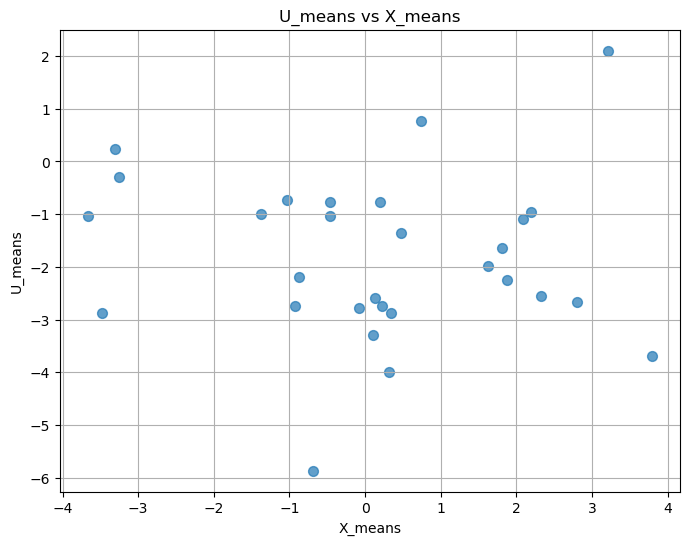

In [137]:
import matplotlib.pyplot as plt

# Convert tensors to numpy
X_means_np = X_means.detach().cpu().numpy()
U_means_np = U_means.detach().cpu().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X_means_np, U_means_np, alpha=0.7, s=50)
plt.xlabel('X_means')
plt.ylabel('U_means')
plt.title('U_means vs X_means')
plt.grid(True)
plt.show()